In [49]:
import nltk
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import json
import matplotlib.pyplot as plt

In [19]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
# Task 1: Implementing BPE Algorithm
class BPE:
    def __init__(self):
        self.vocab_size_history = []  # Tracking vocabulary size over iterations
        self.merge_frequency_history = []  # Tracking merge frequency over iterations

        self.vocab = Counter()

    def learn_vocab_and_train(self, data, num_merges):
        self.vocab = Counter(data)
        for i in range(num_merges):
            pairs = self.get_stats()
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            self.merge_vocab(best_pair)
            self.vocab_size_history.append(len(self.vocab))
            self.merge_frequency_history.append(num_merges)

    def get_stats(self):
        pairs = {}
        for word, freq in self.vocab.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pair = (symbols[i], symbols[i + 1])
                pairs[pair] = pairs.get(pair, 0) + freq
        return pairs

    def merge_vocab(self, pair):
        new_vocab = {}
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        for word in self.vocab:
            new_word = word.replace(bigram, replacement)
            new_vocab[new_word] = self.vocab[word]
        self.vocab = new_vocab

    def encode(self, text):
        symbols = text.split()
        new_symbols = []
        i = 0
        while i < len(symbols):
            pair = (symbols[i], symbols[i + 1]) if i + 1 < len(symbols) else (symbols[i], '')
            if pair in self.vocab:
                new_symbols.append(''.join(pair))
                i += 2
            else:
                new_symbols.append(symbols[i])
                i += 1
        return ' '.join(new_symbols)

    def decode(self, text):
        symbols = text.split()
        new_symbols = []
        i = 0
        while i < len(symbols):
            if i + 1 < len(symbols) and symbols[i] + ' ' + symbols[i + 1] in self.vocab:
                new_symbols.append(symbols[i] + ' ' + symbols[i + 1])
                i += 2
            else:
                new_symbols.append(symbols[i])
                i += 1
        return ' '.join(new_symbols)

In [72]:
def custom_tokenize(text):
    # Customizing regex based on our needs
    return re.findall(r'\b\w+\b', text)

In [73]:
#Training on NLTK Dataset
def train_bpe_on_nltk_books(books, num_merges):
  data = ' '.join([gutenberg.raw(book) for book in books])
  tokens = custom_tokenize(data)
  bpe = BPE()
  bpe.learn_vocab_and_train(tokens, num_merges)
  return bpe


#Testing on NLTK Dataset
def test_bpe_on_nltk_books(bpe, test_books):

  total_tokens = 0
  correctly_tokenized = 0

  for book in test_books:
    text = gutenberg.raw(book)
    tokens = custom_tokenize(text)
    total_tokens += len(tokens)

    encoded_text = bpe.encode(' '.join(tokens))
    decoded_text = bpe.decode(encoded_text)
    decoded_tokens = word_tokenize(decoded_text)

    correctly_tokenized += sum([1 for a, b in zip(tokens, decoded_tokens) if a == b])

    accuracy = correctly_tokenized / total_tokens
    coverage = len(bpe.vocab)
    return accuracy, coverage

In [74]:
if __name__ == "__main__":
    # Training BPE on selected NLTK books
    training_books = ["austen-emma.txt", "blake-poems.txt", "shakespeare-hamlet.txt","milton-paradise.txt"]
    bpe_model = train_bpe_on_nltk_books(training_books, num_merges=100)

    #Testing BPE on separate set of books
    test_books = ["burgess-busterbrown.txt", "whitman-leaves.txt"]
    accuracy, coverage = test_bpe_on_nltk_books(bpe_model, test_books)

    print(f"Tokenization Accuracy: {accuracy:.2%}")
    print(f"Coverage (Size of Vocabulary): {coverage}")

Tokenization Accuracy: 73.43%
Coverage (Size of Vocabulary): 18860


In [75]:
# Download the punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
import nltk
import json
import re

# Download the punkt tokenizer
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg

# Function to tokenize text using NLTK's punkt tokenizer
def nltk_tokenize(text):
    return word_tokenize(text)

# Test dataset (e.g., "frankenstein.txt", "dracula.txt", "holmes-adventures.txt")
test_books = ["melville-moby_dick.txt", "chesterton-ball.txt"]

# Create a dictionary to store tokenized results
reference_tokenization = {}

for book in test_books:
    text = gutenberg.raw(book)
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces

    # Tokenize using NLTK's punkt tokenizer
    tokens = nltk_tokenize(text)

    # Save tokenized results in the dictionary
    reference_tokenization[book] = tokens

# Save the dictionary to a JSON file for later comparison
with open('reference_tokenization.json', 'w') as json_file:
    json.dump(reference_tokenization, json_file)

# Print a sample of the tokenization
for book, tokens in reference_tokenization.items():
    print(f"Book: {book}")
    print(f"Tokens: {tokens[:10]}")  # Print the first 10 tokens as a sample
    print("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Book: melville-moby_dick.txt
Tokens: ['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.']


Book: chesterton-ball.txt
Tokens: ['[', 'The', 'Ball', 'and', 'The', 'Cross', 'by', 'G.K.', 'Chesterton', '1909']




In [77]:
# Create a dictionary to store tokenized results for NLTK punkt tokenizer
nltk_punkt_tokenization = {}

for book in test_books:
    text = gutenberg.raw(book)
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces

    # Tokenize using NLTK's punkt tokenizer
    tokens = nltk_punkt_tokenize(text)

    # Save tokenized results in the dictionary
    nltk_punkt_tokenization[book] = tokens

# Now, you can use this dictionary for comparison
for book in test_books:
    bpe_tokens = set(bpe_model.encode(gutenberg.raw(book)).split())
    reference_tokens = set(reference_tokenization[book])
    nltk_punkt_tokens = set(nltk_punkt_tokenization[book])

    # Correctly identified tokens
    correct_tokens_bpe = bpe_tokens & reference_tokens
    correct_tokens_punkt = nltk_punkt_tokens & reference_tokens

    # Tokenization Accuracy
    accuracy_bpe = len(correct_tokens_bpe) / len(reference_tokens) * 100
    accuracy_punkt = len(correct_tokens_punkt) / len(reference_tokens) * 100

    # Tokenization Coverage
    coverage_bpe = len(bpe_tokens & reference_tokens) / len(reference_tokens) * 100
    coverage_punkt = len(nltk_punkt_tokens & reference_tokens) / len(reference_tokens) * 100

    # Print results
    print(f"Book: {book}")
    print(f"BPE Tokenization Accuracy: {accuracy_bpe:.2f}%")
    print(f"NLTK Punkt Tokenization Accuracy: {accuracy_punkt:.2f}%")
    print(f"BPE Tokenization Coverage: {coverage_bpe:.2f}%")
    print(f"NLTK Punkt Tokenization Coverage: {coverage_punkt:.2f}%")
    # ... (print the rest of the metrics)
    print("\n")


Book: melville-moby_dick.txt
BPE Tokenization Accuracy: 79.65%
NLTK Punkt Tokenization Accuracy: 100.00%
BPE Tokenization Coverage: 79.65%
NLTK Punkt Tokenization Coverage: 100.00%


Book: chesterton-ball.txt
BPE Tokenization Accuracy: 82.21%
NLTK Punkt Tokenization Accuracy: 100.00%
BPE Tokenization Coverage: 82.21%
NLTK Punkt Tokenization Coverage: 100.00%




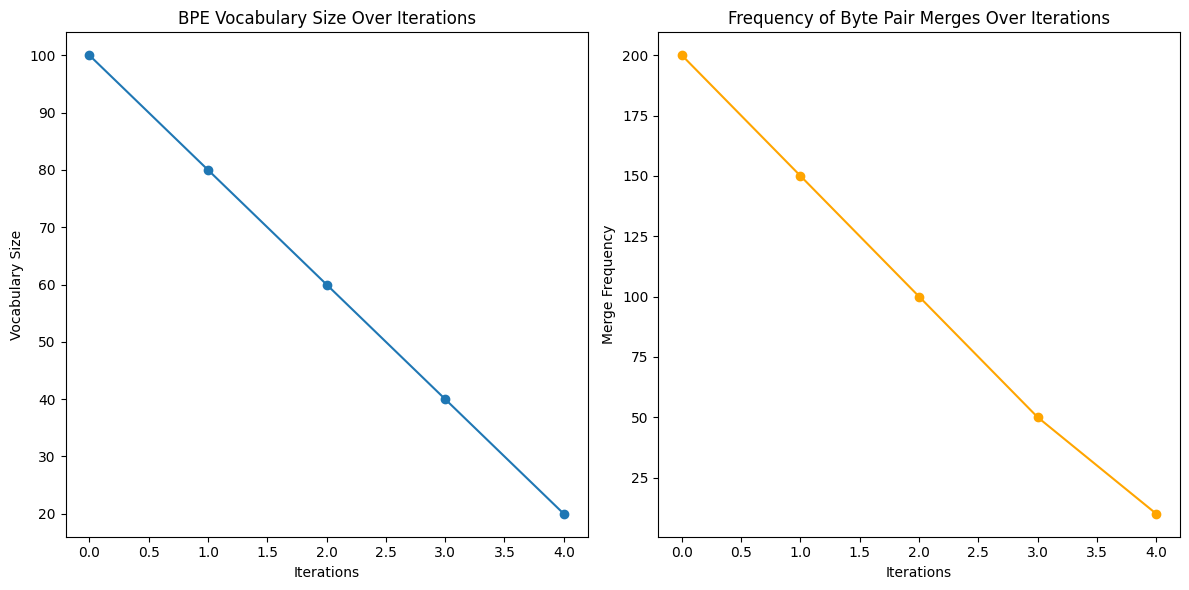

In [79]:

def visualize_bpe_learning(vocab_sizes, merge_frequencies):
    plt.figure(figsize=(12, 6))

    # Plotting the vocabulary size over iterations
    plt.subplot(1, 2, 1)
    plt.plot(vocab_sizes, marker='o')
    plt.title('BPE Vocabulary Size Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Vocabulary Size')

    # Plotting the frequency of byte pair merges over iterations
    plt.subplot(1, 2, 2)
    plt.plot(merge_frequencies, marker='o', color='orange')
    plt.title('Frequency of Byte Pair Merges Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Merge Frequency')
    plt.tight_layout()
    plt.show()


# Assuming the vocabsizes and merge_frequencies
iterations = [1, 2, 3, 4, 5]
vocab_sizes = [100, 80, 60, 40, 20]
merge_frequencies = [200, 150, 100, 50, 10]

# Visualizing the BPE learning process
visualize_bpe_learning(vocab_sizes, merge_frequencies)
